Задание выполнила Анастасия Плавина

Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

FileNotFoundError: [Errno 2] File ./WA_Fn-UseC_-Telco-Customer-Churn.csv does not exist: './WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
df.columns

##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

0 (Male) - 50%
1 (Female) - 50%


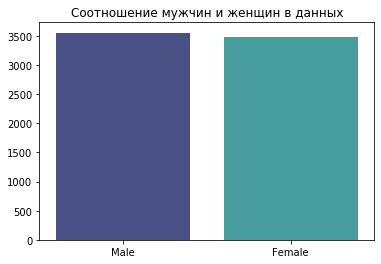

In [2]:
#Ваш код здесь
import matplotlib.pyplot as plt
import seaborn as sns

counts = df['gender'].value_counts()

print(f'0 (Male) - {counts["Male"]/df.shape[0]*100:.0f}%')
print(f'1 (Female) - {counts["Female"]/df.shape[0]*100:.0f}%')


plt.figure(figsize=(6,4))    
plt.title('Соотношение мужчин и женщин в данных')
sns.barplot(counts.index, counts.values, palette='mako')
plt.show()

##### 2. Какое количество уникальных значений у поля InternetService?

In [3]:
#Ваш код здесь
print(f'Количество уникальных значений у поля InternetService: {len(df["InternetService"].unique())}')
df['InternetService'].value_counts()

Количество уникальных значений у поля InternetService: 3


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [4]:
#Ваш код здесь

# без замены строк, содержащих пробелы поменять тип данных не можем
# df['TotalCharges'] = df['TotalCharges'].astype(float)


# print(f'Median TotalCharges:\t{df["TotalCharges"].median():.2f}')
# print(f'Mean TotalCharges:\t{df["TotalCharges"].mean():.2f}')
# print(f'Std TotalCharges:\t{df["TotalCharges"].std():.2f}')

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных).

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [5]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [6]:
#Ваш код здесь

def replace_values(df, feature, value1, value2):
    df.loc[df[feature] == value1, feature] = value2
    
replace_values(df, 'PhoneService', 'No', 0)
replace_values(df, 'PhoneService', 'Yes', 1)

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [7]:
df[df['TotalCharges'] == ' '].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [8]:
#Ваш код здесь
replace_values(df, 'TotalCharges', ' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype('float64')
df['TotalCharges'].fillna(0, inplace=True)


print(f'Median TotalCharges:\t{df["TotalCharges"].median():.2f}')
print(f'Mean TotalCharges:\t{df["TotalCharges"].mean():.2f}')
print(f'Std TotalCharges:\t{df["TotalCharges"].std():.2f}')

# в вопросе подсчет статистик у признака с типом object невозможен, до заполнения пробелов изменить тип данных также невозможно.

Median TotalCharges:	1394.55
Mean TotalCharges:	2279.73
Std TotalCharges:	2266.79


In [9]:
df['TotalCharges'].isna().sum()

0

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [10]:
#Ваш код здесь

replace_values(df, 'Churn', 'No', 0)
replace_values(df, 'Churn', 'Yes', 1)

df['Churn'].unique()

array([0, 1], dtype=object)

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [11]:
#Ваш код здесь
to_binary = ['StreamingMovies', 'StreamingTV', 'TechSupport']

for col in to_binary:
    replace_values(df, col, 'No', 0)
    replace_values(df, col, 'No internet service', 0)
    replace_values(df, col, 'Yes', 1)
    print(col, df[col].unique()) # проверям успешность замен

StreamingMovies [0 1]
StreamingTV [0 1]
TechSupport [0 1]


##### 8. Заполните пропуски в поле PhoneService значением 0

In [12]:
#Ваш код здесь
df['PhoneService'].fillna(0, inplace=True)
df['PhoneService'].unique()

array([0, 1])

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [13]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']


#Ваш код здесь
df = df[['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']]


df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.85,0,0,0,0
1,Male,34,1,1889.50,0,0,0,0
2,Male,2,1,108.15,0,0,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [14]:
from sklearn.model_selection import train_test_split

features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = df['Churn']
target = target.astype(int)

#Ваш код здесь

X_train, X_test, y_train, y_test = train_test_split(df[features], target, shuffle=True, 
                                                    test_size=0.30, random_state=42)


##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [16]:
#Ваш код здесь
gender.fit_transform(X_train)

,gender_Female,gender_Male
1695,0,1
1095,0,1
3889,0,1
3667,1,0
2902,1,0
...,...,...
3772,0,1
5191,1,0
5226,0,1
5390,0,1


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [17]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])


# это может быть полезно, если работаем с моделями, для которых нужна стандартизация (например, лог.регрессия)

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [18]:
#Ваш код здесь

TotalCharges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])


Объединение всех "кубиков" очень легко сделать таким образом

In [19]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [20]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features', feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

model = pipeline.fit(X_train, y_train)

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [22]:
#Ваш код здесь

y_test_pred_proba = pipeline.predict_proba(X_test)

y_test_pred_proba[:5]

array([[0.29, 0.71],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.02, 0.98],
       [0.82, 0.18]])

Вероятности предсказаны для обоих классов.

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [23]:
from sklearn.metrics import roc_auc_score, log_loss, precision_recall_curve, precision_recall_curve, plot_precision_recall_curve, classification_report, f1_score, precision_score, recall_score

#Ваш код здесь
print(f'Метрика roc_auc:\t\t{roc_auc_score(y_test, y_test_pred_proba[:, 1]):.2f}')
print(f'Метрика log_loss:\t{log_loss(y_test, y_test_pred_proba[:, 1]):.2f}')



Метрика roc_auc:		0.79
Метрика log_loss:	0.72


Мы получили достаточно хороший результат и устойчивые показатели по двум метрикам. Проверим f1, precision и recall и оптимальный порог.

In [24]:
def get_classification_report(model, X_test, y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))
    plot_precision_recall_curve(model, X_test, y_test_true)

In [25]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [26]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

Смотрим метрики на трейне и тесте

TRAIN

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3635
           1       0.99      0.99      0.99      1295

    accuracy                           0.99      4930
   macro avg       0.99      0.99      0.99      4930
weighted avg       0.99      0.99      0.99      4930

TEST

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1539
           1       0.58      0.48      0.52       574

    accuracy                           0.76      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.75      0.76      0.76      2113

CONFUSION MATRIX

col_0     0    1
Churn           
0      1337  202
1       299  275


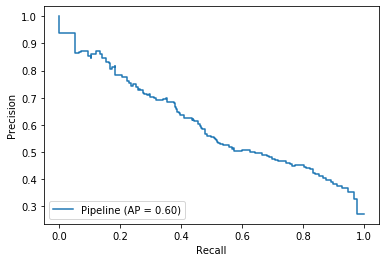

In [27]:
get_classification_report(model, X_test, y_train, y_train_pred, y_test, y_test_pred)

Видим, что на трейне результат значительно превышает результат на тесте для целевого класса. В будущем необходим подбор гиперпараметров и доработка признаков.

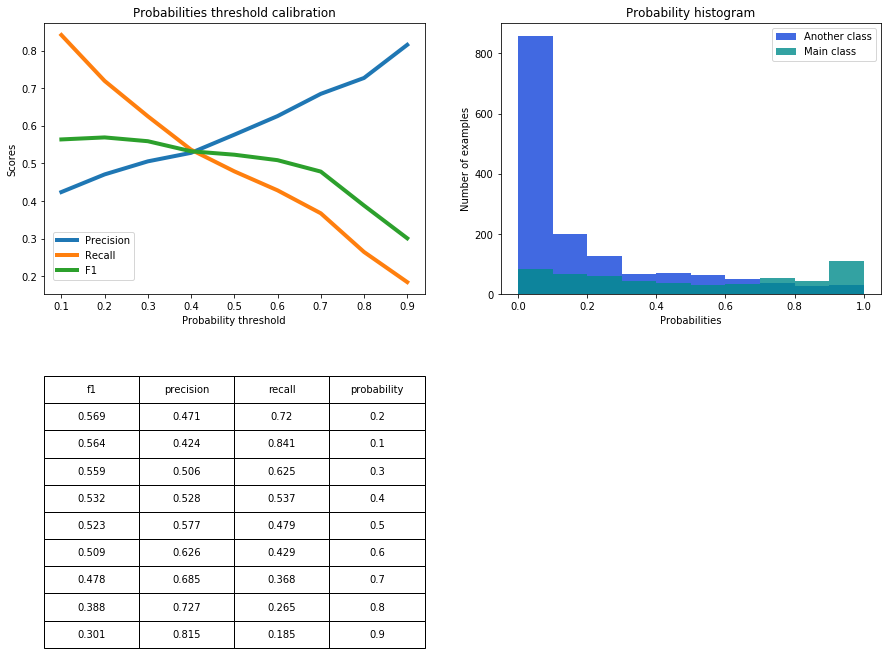

In [28]:
show_proba_calibration_plots(y_test_pred_proba[:, 1], y_test)

Оптимальный результат по всем метрикам получаем при пороге приблизительно 0.41

### Сохраним наш пайплайн

In [30]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)